### Seaborn 공부
- Python에서 통계 그래픽을 만들기 위한 라이브러리
- matplotlib 위에 구축 되며 pandas데이터 구조와 밀접하게 통합된다.

## Seaborn 소개

가. seaborn 수행 작업 소개

In [8]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

In [2]:
# seaborn 라이브러리 임포트 하기
# 축약어로 sns로 쓴다
import seaborn as sns

In [ ]:
#  seaborn은 plot을 그리기 위해 matplotlib을 사용한다.
# 인터프리터(대화형 툴)인 Jupyter notebook, Ipython 인터페이스에서는 별다른 작업 없이 plot을 볼수 있다
# 하지만 다른 인터페이스에서는 matplotlib.pypot.show()를 호출해야한다.

In [2]:
# matplotlib rcParam 시스템을 사용하여 seaborn으로 만들지 않더라도 모든 matplotlib plot 모양에 영향을 끼친다.
# 기본 테마 외에도 옵션을 선택하여 바꿀 수 있다.
#  matplotlib의 기본 값이 마음에 들거나 다른 테마를 선호하는 경우 이 단계는 넘길것
sns.set_theme()

In [4]:
# Load an example dataset
# 데이터 로드하는 것임
# pandas.read_csv()해도 됨
tips = sns.load_dataset("tips")


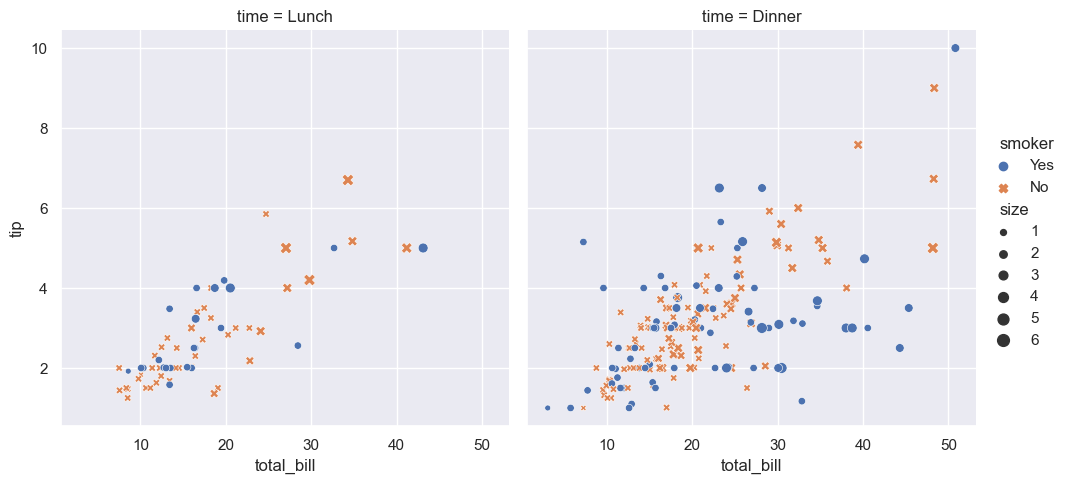

In [9]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)
plt.show()

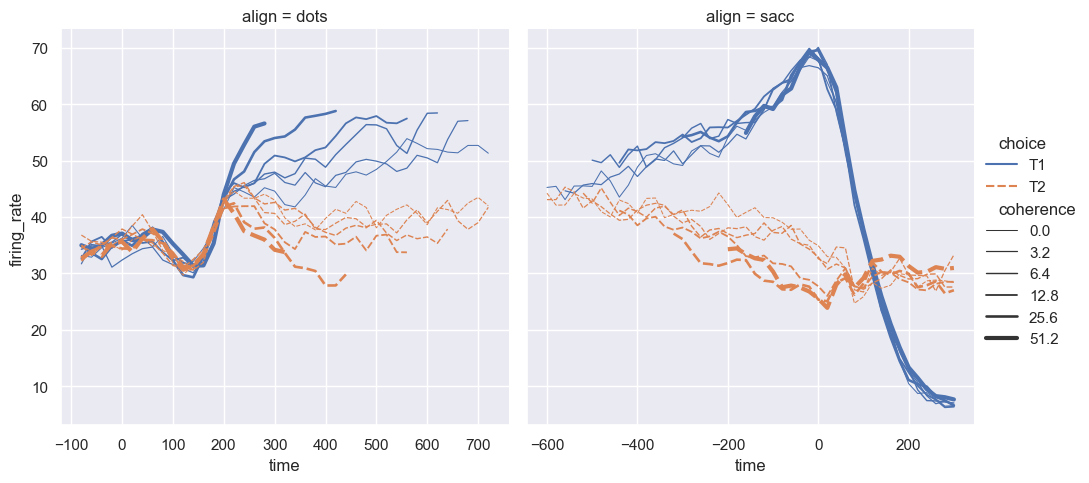

In [10]:
# replot() 쓰이는 매개변수
# 1. kind : 다른 표현방식으로 쉽게 전환할 수 있다(default는 산점도)
# 2. size, style이 산점도와 선 도표에 사용되는 방식이 다르니 주의 할 필요가 있다.
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)
plt.show()

### 통계적 추정
부트스트래핑으로 통계 신뢰 구간을 계산하고 추정의 불확실성을 나타내는
오차 막대를 그려준다.

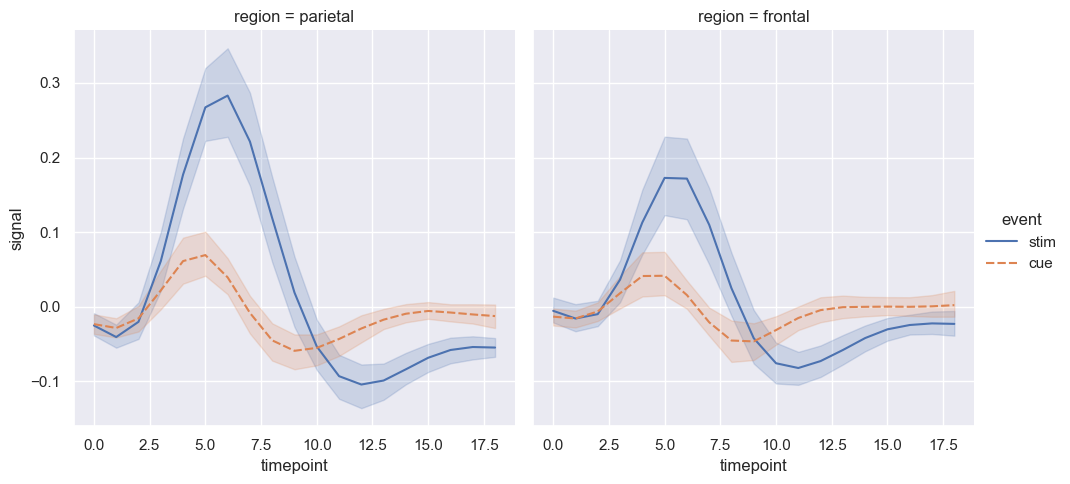

In [5]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)
plt.show()

seaborn 통계적 추정은 기술 통계를 넘어선다.  
예를 들어 아래의 선형 회귀 모델을 포함하여 산점도를 향상 시킬 수 있다.  
lmplot을 사용하여

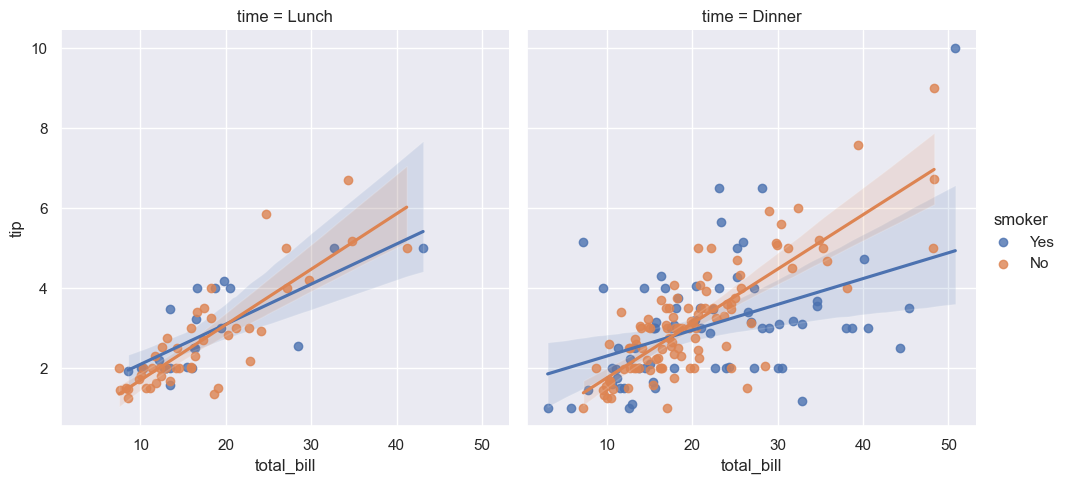

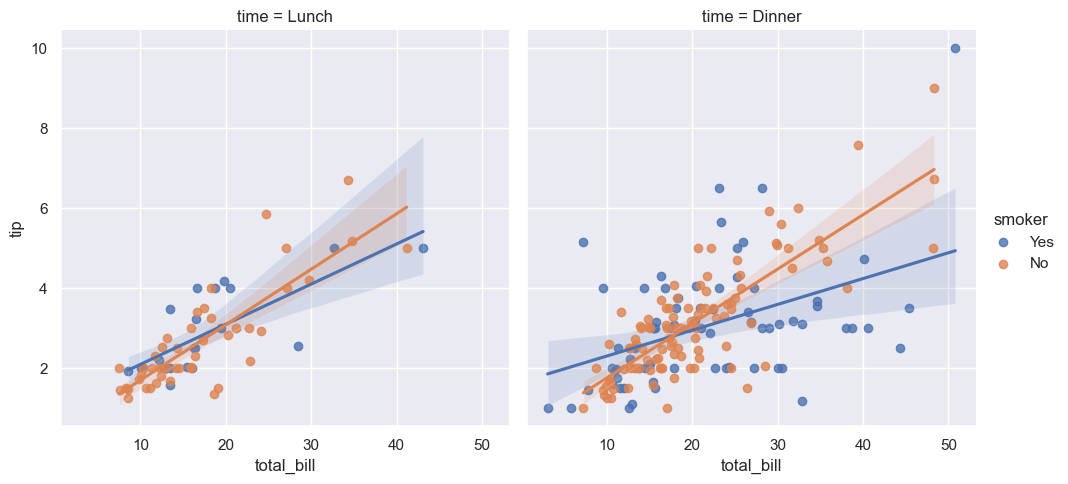

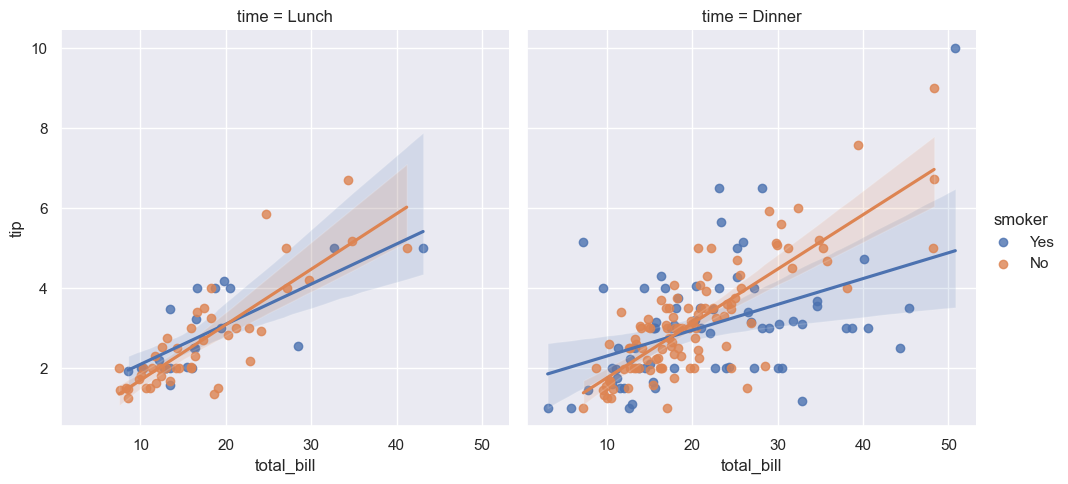

In [8]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")
plt.show()

### 분포 표현
seaborn에는 displot() 함수를 사용하여 분포를 시각화하는 여러 접근방식을 지원해준다.
히스토그램과 같은 고전적인 기술과 커널 밀도 추정과 같은 계산 집약적인 접근 방식이 포함된다.

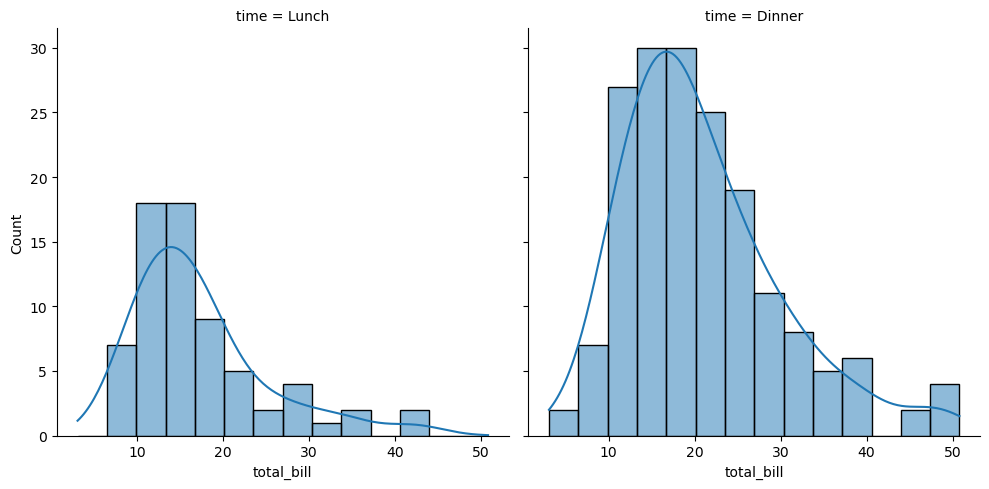

In [5]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

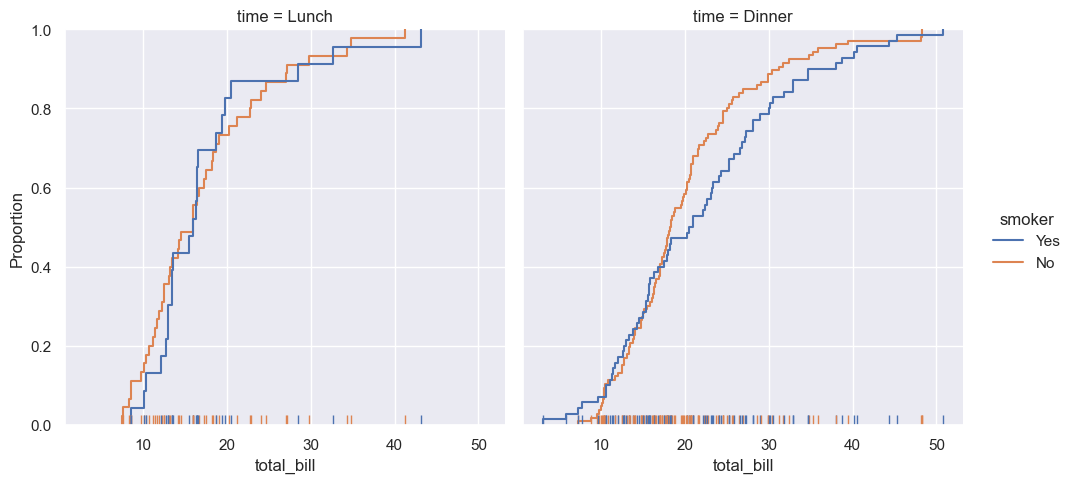

In [10]:
# 또한 데이텅의 경험적 누적 분포 함수를 계산하고 플로팅하는 것과 같이 강력하지만 덜 익숙한 기술도 있다.
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True);
plt.show()

### 범주형 데이터에 대한 플롯
seaborn에는 범주형 데이터를 시각화하는 여러 특수 플롯 유형이 있다.

catplot()함수를 통해 접근할 수 있다.

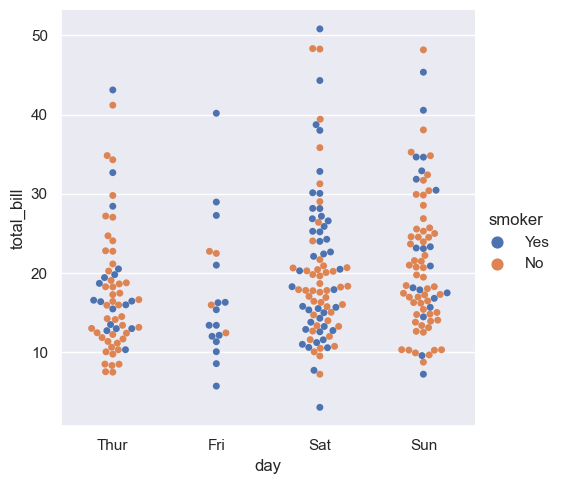

In [13]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")
plt.show()

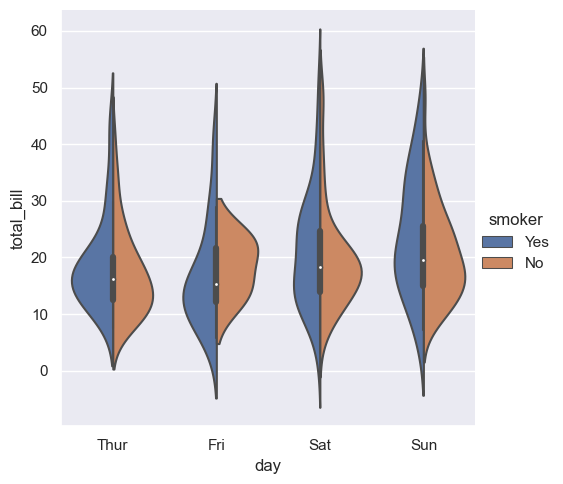

In [14]:
# 커널 밀도 추정을 사용하여 포인트가 샘플링되는 기본 분포를 나타낼 수 있다.
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)
plt.show()

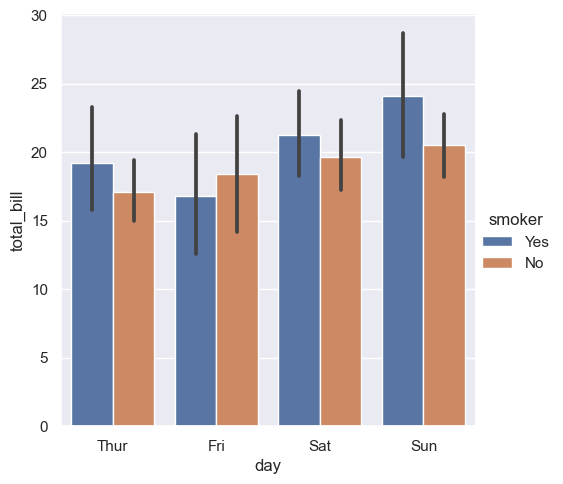

In [15]:
#  각 중척 범주 내에서 평균값과 신뢰 구간만 표시할 수 있다.
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")
plt.show()

### 복잡한 데이터 세트에 대한 다변량 보기
seaborn은 여러 종류의 플롯을 결합하여 데이터 세트에 대한 정보 요약을 제공하는 함수가 있다.

jointplot() 는 단일 관계에 중점을 둔다. 각 변수의 주변 분포와 함께 두 변수 간의 결합 분포를 플로팅한다.

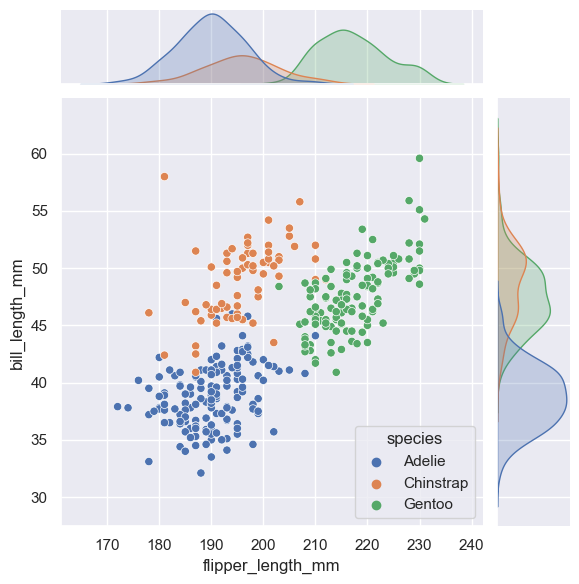

In [16]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")
plt.show()

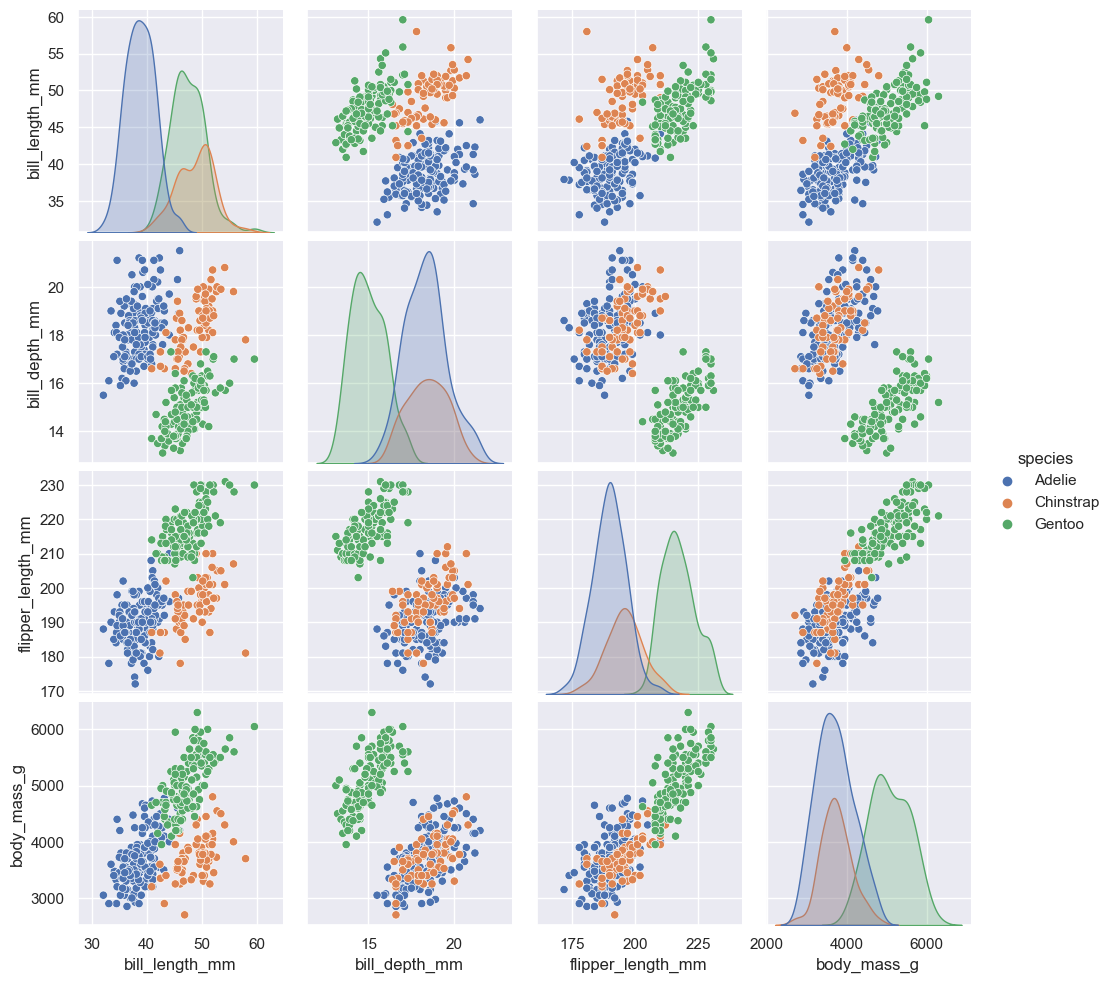

In [17]:
# 다른 하나는 pairplot()으로 더 넓은 관점을 보여줍니다. 모든 쌍별 관계와 각 변수에 대한 공동 및 한계 분포를 각각
# 보여줍니다.
sns.pairplot(data=penguins, hue="species")
plt.show()

 ### 수치 작성을 위한 하위 수준 도구
 이러한 도구는 축 수준 플로팅 기능을 그림의 레이아웃을 관리하는 개체와 결합하여 데이터 집합의 구조를 축 그리드에 연결하여 작동합니다.
 
 두 요소 모두 공용 API의 일부이며 코드 몇줄 만 더 추가하면 복잡한 그림을 만드는데 직접 사용할 수 있습니다.

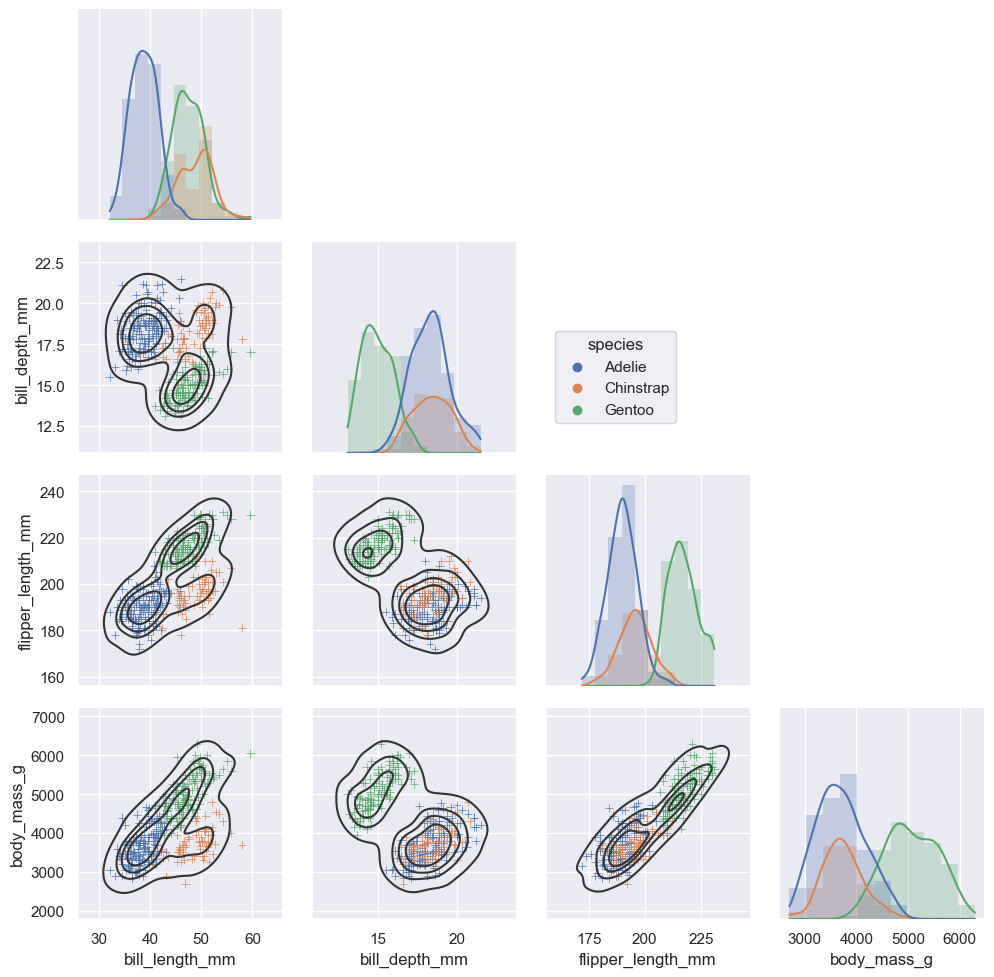

In [20]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))
plt.show()

### 신중한 기본값 및 유연한 사용자 정의

Seaborn은 단일 함수 호출로 완전한 그래픽을 생성한다.  
가능한 경우 해당 함수는 플롯의 의미론적 매핑을 설명하는 유익한 축 레이블과 범례를 자동으로 추가한다.  

많은 경우 seaborn은 데이터의 특성에 따라 매개변수의 기본값을 선택하기도 한다.  
예를 들어 지금까지 살펴본 색상 매핑은 할당된 범주형 변수의 다양한 수준을 나타내기 위해 뚜렷한 색조(파란색, 주황색, 때로는 녹색)를 사용했다.
숫자 변수를 매핑할 때 일부 함수는 연속 그라데이션으로 자동 전환 된다.


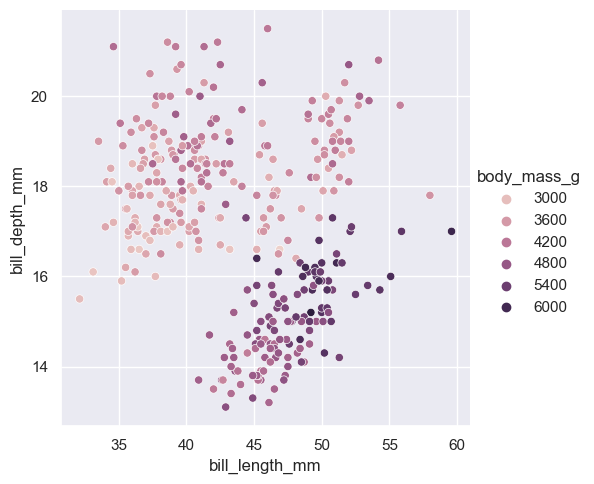

In [21]:
sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
)
plt.show()

seaborn은 여러 수준의 사용자 정의를 허용한다.  
모든 그림에 적용되는 여러 내장 테마를 정의하고, 함수에는 각 플롯의 의미론적 매핑을 수정할 수 있는 표준화된 매개변수가 있으며, 추가 키워드 인수가 기본 matplotlib 아티스트에게 전달되어 훨씬 더 많은 제어가 가능하다.  
플롯을 생성한 후에는 seaborn API를 통해 그리고 미세 조정을 위해 matplotlib레이어로 드롭 다운하여 해당속성을 수정할 수 있다.

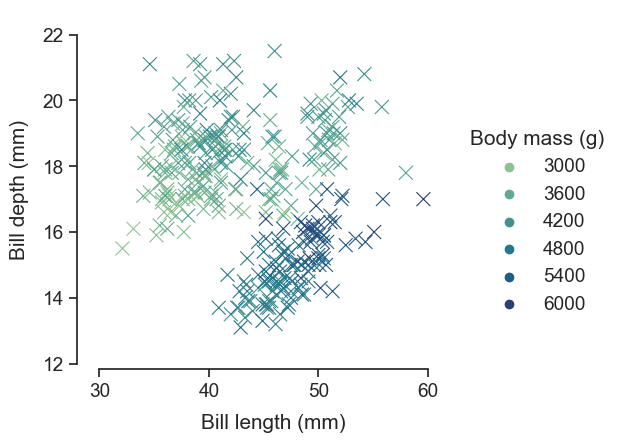

In [22]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)
plt.show()

### matplotlib과의 관계
Seaborn과 matplotlib의 통합을 통해 노트북의 탐색적 분석, GUI 애플리케이션의 실시간 상호 작용, 여러 래스터 및 벡터 형식의 보관 출력을 포함하여 matplotlib가 지원하는 많은 환경에서 Seaborn을 사용할 수 있습니다.  

seaborn 기능만 사용하여 생산성을 높일 수 있지만 그래픽을 완전히 사용자 지정하려면 matplotlib의 개념과 API에 대한 지식이 필요합니다. seaborn의 새로운 사용자를 위한 학습 곡선의 한 측면은 특정 사용자 지정을 달성하기 위해 matplotlib 레이어로 드롭다운이 필요한 때를 아는 것입니다. 반면에 matplotlib에서 오는 사용자는 많은 지식이 이전된다는 것을 알게 될 것입니다.  
  
Matplotlib에는 포괄적이고 강력한 API가 있습니다. 그림의 거의 모든 속성을 원하는 대로 변경할 수 있습니다. seaborn의 높은 수준의 인터페이스와 matplotlib의 깊은 사용자 정의 기능을 결합하면 데이터를 빠르게 탐색하고 출판 품질의 최종 제품에 맞출 수 있는 그래픽을 만들 수 있습니다.

=> Seaborn : 기본값 자체의 시각화가 뛰어나다. 하지만 그래픽을 완전히 사용자 지정하려면 matplotlib에 대한 개념과 API에 대한 지식이 있어야한다. 
=> matplotlib : 사용자 정의가 자유롭다. 더 효과적인 시각화를 만들어 낼 수 있다. 

### 참고할 페이지 정리
1. 예제 갤러리 : seaborn으로 생성할 수 있는 그래픽 종류에 대한 넓은 의미 파악  
2. 사용자 가이드 및 튜토리얼 : 다양한 도구와 도구의 용도에 대해 자세한 학습
3. API 참조 페이지 : 특정 플롯이 있고 그것을 만드는 방법을 확인할 때, 각 함수의 매개 변수를 문서화하고 사용하는 법에대한 정리와 많은 예제포함

